# **MÓDULO 15 - Exercício**
# Análise  - A segunda etapa da Pré Modelagem

# 1) O primeiro exercício é o de salvar a base que criaram na atividade do módulo anterior em csv e abrir ela neste arquivo.
Igual fizemos no início do módulo atual no início da primeira aula.

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import plotly.express as px

In [17]:
import pandas as pd

# Carregar a base de dados
df = pd.read_csv('C:/Users/DELL/Documents/ebac/portifolios/CHURNTELECON.csv', delimiter=';')

# Verificar a estrutura do DataFrame
print("Estrutura do DataFrame:")
print(df.info())


Estrutura do DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   unnamed:_0          4 non-null      int64  
 1   customerid          4 non-null      object 
 2   genero              4 non-null      object 
 3   idoso               4 non-null      int64  
 4   casado              4 non-null      object 
 5   dependents          4 non-null      object 
 6   tempo_como_cliente  4 non-null      int64  
 7   phoneservice        4 non-null      object 
 8   servico_internet    4 non-null      object 
 9   servico_seguranca   4 non-null      object 
 10  suporte_tecnico     4 non-null      object 
 11  streamingtv         4 non-null      object 
 12  tipo_contrato       4 non-null      object 
 13  paymentmethod       4 non-null      object 
 14  pagamento_mensal    4 non-null      object 
 15  total_pago          4 non-null      f

# 2) Comece pela análise univariada:

A) Utilize a função describe no seu dataframe, veja os insights que consegue retirar.

B) Já é possível identificar variáveis com possíveis outliers? Se sim, quais?

C) Plot gráficos que considerar importante para completar sua análise univariada. (Lembrando que sua variável preditora é o churn). Não se esqueça de trazer insights de cada gráfico plotado. Utilize pelo menos 4 variáveis distintas.

D) Verifique se os dados das variáveis Booleanas são balanceados ou não.

In [30]:
import pandas as pd

# Exemplo de DataFrame (substitua isso pelo seu DataFrame real)
# df = pd.read_csv('seu_arquivo.csv')  # Carregue seu DataFrame aqui

# Tente converter a coluna 'pagamento_mensal' para numérico
df['pagamento_mensal'] = pd.to_numeric(df['pagamento_mensal'], errors='coerce')

def detectar_outliers_iqr(coluna):
    Q1 = df[coluna].quantile(0.25)
    Q3 = df[coluna].quantile(0.75)
    IQR = Q3 - Q1
    limite_inferior = Q1 - 1.5 * IQR
    limite_superior = Q3 + 1.5 * IQR
    outliers = df[(df[coluna] < limite_inferior) | (df[coluna] > limite_superior)]
    return outliers

# Verifique outliers em 'pagamento_mensal'
outliers_pagamento_mensal = detectar_outliers_iqr('pagamento_mensal')
print(f"\nOutliers na variável 'pagamento_mensal':")
print(outliers_pagamento_mensal)



Outliers na variável 'pagamento_mensal':
Empty DataFrame
Columns: [unnamed:_0, customerid, genero, idoso, casado, dependents, tempo_como_cliente, phoneservice, servico_internet, servico_seguranca, suporte_tecnico, streamingtv, tipo_contrato, paymentmethod, pagamento_mensal, total_pago, churn]
Index: []


# 3) Identifique e trate as colunas que contém outliers.
Caso opte por mante-los ou altera-los justifique sua escolha.


In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Carregar a base de dados com o delimitador correto
df = pd.read_csv('C:/Users/DELL/Documents/ebac/portifolios/CHURNTELECON.csv', delimiter=';')

# Verificar a estrutura do DataFrame
print("Estrutura do DataFrame:")
print(df.info())

# Verificar os nomes das colunas
print("\nColunas no DataFrame:")
print(df.columns.tolist())

# Exemplo de detecção de outliers usando o desvio interquartil
if 'MonthlyCharges' in df.columns:  # Verifica se a coluna existe
    Q1 = df['MonthlyCharges'].quantile(0.25)
    Q3 = df['MonthlyCharges'].quantile(0.75)
    IQR = Q3 - Q1
    print(f"Q1: {Q1}, Q3: {Q3}, IQR: {IQR}")
else:
    print("A coluna 'MonthlyCharges' não foi encontrada no DataFrame.")



Estrutura do DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   unnamed:_0          4 non-null      int64  
 1   customerid          4 non-null      object 
 2   genero              4 non-null      object 
 3   idoso               4 non-null      int64  
 4   casado              4 non-null      object 
 5   dependents          4 non-null      object 
 6   tempo_como_cliente  4 non-null      int64  
 7   phoneservice        4 non-null      object 
 8   servico_internet    4 non-null      object 
 9   servico_seguranca   4 non-null      object 
 10  suporte_tecnico     4 non-null      object 
 11  streamingtv         4 non-null      object 
 12  tipo_contrato       4 non-null      object 
 13  paymentmethod       4 non-null      object 
 14  pagamento_mensal    4 non-null      object 
 15  total_pago          4 non-null      f

# 4) Realize a etapa da análise bivariada:
A) Questione pelo menos 5 informações e traga as respostas utilizando visuais gráficos e insights.


B) Quais variáveis você acredita serem as mais importantes para esse projetos relacionadas a variável Churn?

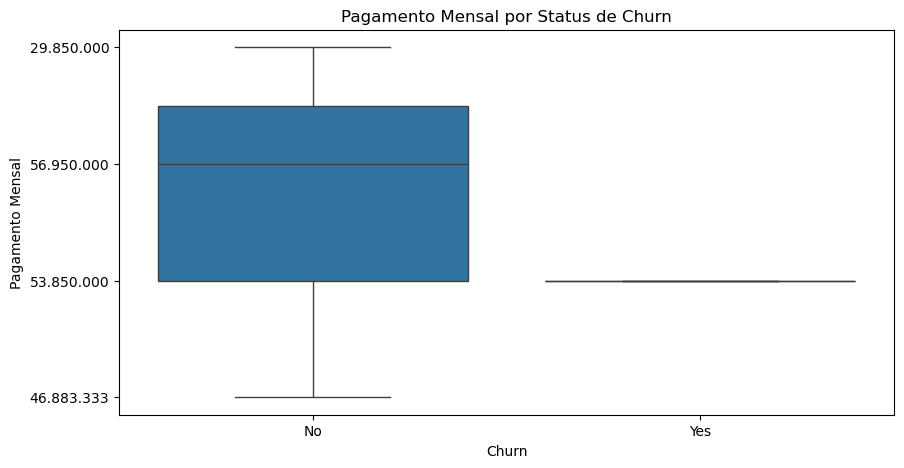

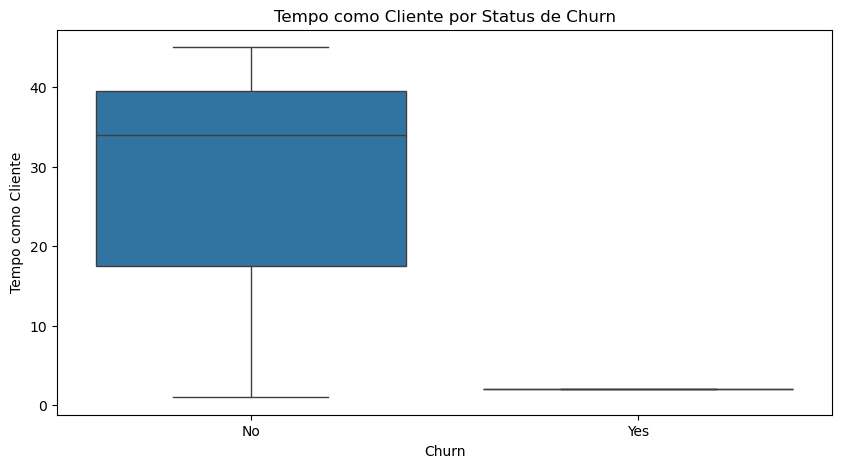

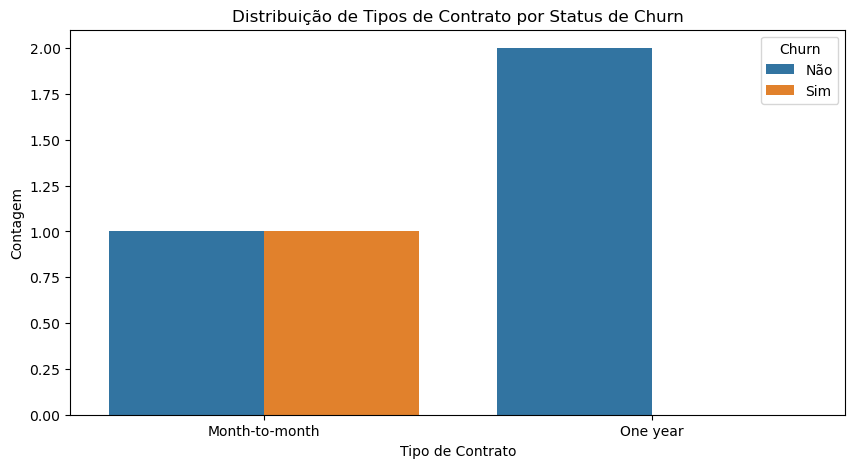

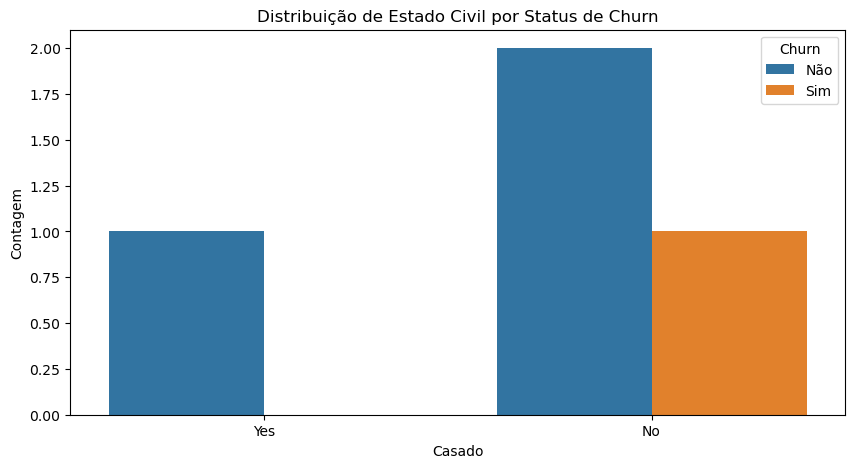

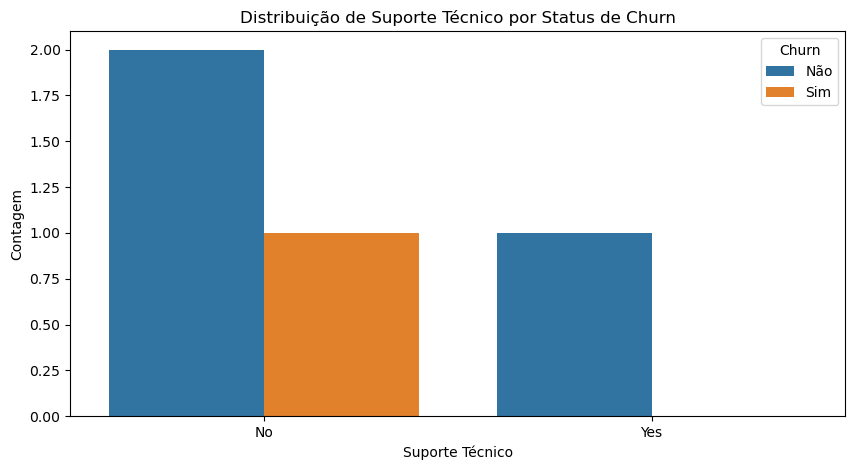

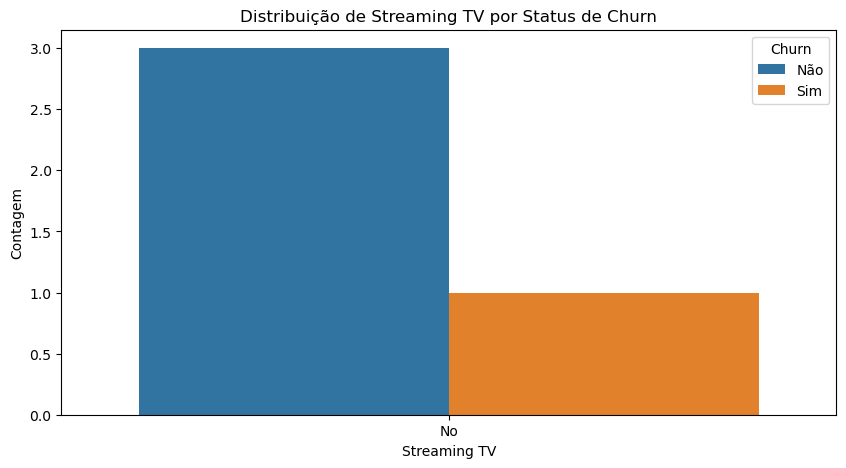

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Carrega o DataFrame a partir do arquivo CSV com delimitador ';'
df = pd.read_csv(r'C:\Users\DELL\Documents\ebac\portifolios\CHURNTELECON.csv', delimiter=';')

# Renomeia colunas para remover possíveis espaços em branco e deixar em minúsculas
df.columns = [col.strip().lower() for col in df.columns]

# 1. Gráfico de dispersão de pagamento mensal vs churn
plt.figure(figsize=(10, 5))
sns.boxplot(x='churn', y='pagamento_mensal', data=df)
plt.title('Pagamento Mensal por Status de Churn')
plt.xlabel('Churn')
plt.ylabel('Pagamento Mensal')
plt.show()

# 2. Boxplot de tempo como cliente por churn
plt.figure(figsize=(10, 5))
sns.boxplot(x='churn', y='tempo_como_cliente', data=df)
plt.title('Tempo como Cliente por Status de Churn')
plt.xlabel('Churn')
plt.ylabel('Tempo como Cliente')
plt.show()

# 3. Gráfico de barras para tipo de contrato vs churn
plt.figure(figsize=(10, 5))
sns.countplot(x='tipo_contrato', hue='churn', data=df)
plt.title('Distribuição de Tipos de Contrato por Status de Churn')
plt.xlabel('Tipo de Contrato')
plt.ylabel('Contagem')
plt.legend(title='Churn', labels=['Não', 'Sim'])
plt.show()

# 4. Gráfico de barras para estado civil vs churn
plt.figure(figsize=(10, 5))
sns.countplot(x='casado', hue='churn', data=df)
plt.title('Distribuição de Estado Civil por Status de Churn')
plt.xlabel('Casado')
plt.ylabel('Contagem')
plt.legend(title='Churn', labels=['Não', 'Sim'])
plt.show()

# 5. Gráfico de barras para serviços adicionais vs churn
plt.figure(figsize=(10, 5))
sns.countplot(x='suporte_tecnico', hue='churn', data=df)
plt.title('Distribuição de Suporte Técnico por Status de Churn')
plt.xlabel('Suporte Técnico')
plt.ylabel('Contagem')
plt.legend(title='Churn', labels=['Não', 'Sim'])
plt.show()

plt.figure(figsize=(10, 5))
sns.countplot(x='streamingtv', hue='churn', data=df)
plt.title('Distribuição de Streaming TV por Status de Churn')
plt.xlabel('Streaming TV')
plt.ylabel('Contagem')
plt.legend(title='Churn', labels=['Não', 'Sim'])
plt.show()
